<a href="https://colab.research.google.com/github/a33211/Data-science-homeworks/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Частина третя: Аналіз датасет c Kaggle.com
Необхідно виконати:

Прочитайте csv файл (використовуйте функцію read_csv)
- Виведіть перші п'ять рядків (використовується функція head)
- Виведіть розміри датасету (використовуйте атрибут shape)

Відповідь: Про скільки книг зберігає дані датасет?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from google.colab import drive
# drive.mount('\content\drive\GOIT_DS_Course_data')

In [2]:
df = pd.read_csv('bestsellers with categories.csv')
#df.head(5)
df.shape

(550, 7)

**Про скільки книг зберігає дані датасет?**

Датасет зберігає данні про 550 книг

In [3]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# **Первинне дослідження даних**
1. Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)


In [4]:
df.isnull().sum()* 100 / len(df)

name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64

**Чи є в якихось змінних пропуски?**

В змінних пропуски відсутні


2. Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)


In [5]:
print(df['genre'].unique())

['Non Fiction' 'Fiction']


**Які є унікальні жанри?**
Унікальні жандри - фантастика/не фантастика (Fiction/Non Fiction)

3. Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

array([[<Axes: title={'center': 'price'}>]], dtype=object)

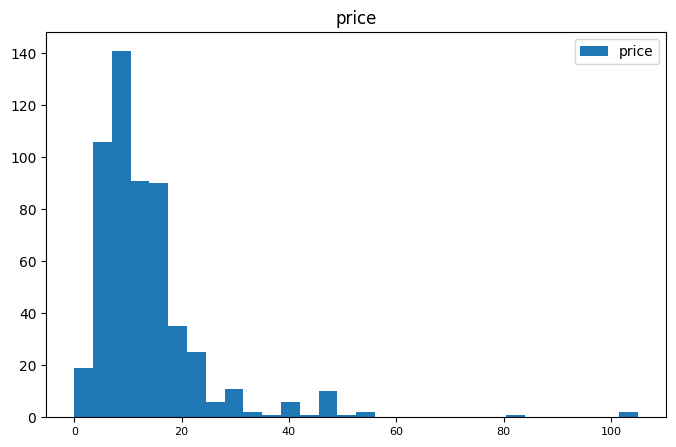

In [6]:
df.hist(column='price', grid = False, xlabelsize = 8, ylabelsize = 10, bins = 30, legend = True,figsize=[8, 5])


4.Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)


In [7]:
df.agg({'price':['max','min','mean','median']})

,price
max,105.0
min,0.0
mean,13.1
median,11.0


**Максимальна ціна?**

105$

**Мінімальна ціна?**

0$

**Середня ціна?**

13.1$

**Медіанна ціна?**

11.0%

# **Пошук та сортування даних**
Відповідь: Який рейтинг у датасеті найвищий? Відповідь:
Відповідь: Скільки книг мають такий рейтинг? Відповідь:
Відповідь: Яка книга має найбільше відгуків? Відповідь:
Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:
Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:
І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
Відповідь: Яка книга остання у відсортованому списку? Відповідь:

In [8]:
agg = df.agg({'user_rating':['max']})
#print(df.filter(agg))
max_agg_query = df.loc[df['user_rating'] == 4.9]
max_agg_query.shape


(52, 7)

In [9]:
df.loc[df['reviews'].idxmax()]
#df[df['reviews']==df['reviews'].max()]

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object

In [10]:
filt = df['year']==2019
df.loc[filt].sort_values('price', ascending = False)




,name,author,user_rating,reviews,price,year,genre
267,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2019,Fiction
291,"Salt, Fat, Acid, Heat: Mastering the Elements ...",Samin Nosrat,4.8,7802,20,2019,Non Fiction
44,Can't Hurt Me: Master Your Mind and Defy the Odds,David Goggins,4.8,16244,18,2019,Non Fiction
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,4.9,7758,18,2019,Fiction
171,Howard Stern Comes Again,Howard Stern,4.3,5272,16,2019,Non Fiction
239,"National Geographic Kids Why?: Over 1,111 Answ...",Crispin Boyer,4.8,5347,16,2019,Non Fiction
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
466,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.6,26490,15,2019,Non Fiction
98,Educated: A Memoir,Tara Westover,4.7,28729,15,2019,Non Fiction
462,The Silent Patient,Alex Michaelides,4.5,27536,14,2019,Fiction


In [11]:
filt = df.loc[(df['genre']=='Fiction')&(df['year'] ==2010)]
print(filt.shape)

(20, 7)


In [12]:
filt = df.loc[(df['user_rating']==4.9)]
val = pd.DataFrame({'year': [2010, 2011]})
filt.isin(val).shape


(52, 7)

In [13]:
filt = df['year']==2015
df = df.drop(df[df.price > 8].index)
df.loc[filt].sort_values('price', ascending = True)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction


- **Який рейтинг у датасеті найвищий?** 

Відповідь: 4.9
- **Скільки книг мають такий рейтинг?**

 Відповідь: 52
- Яка книга має найбільше відгуків? 

Відповідь: Where the Crawdads Sing by Delia Owens
- **- З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?** 

Відповідь:Player's Handbook (Dungeons & Dragons) by Wizards RPG Team
- ***Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? ***

Відповідь: 20
- ***Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?***

Відповідь: 52
- І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

**Яка книга остання у відсортованому списку?** 

Відповідь: Oh, the Places You'll Go!	

# **Агрегування даних та з'єднання таблиць**

In [14]:
#df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.groupby(by=['genre'],as_index=False).agg({'price':['max', 'min']})

genre price    
                 max min
0      Fiction     8   0
1  Non Fiction     8   0



Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

- **Максимальна ціна для жанру Fiction:**

 Відповідь 8

- **Мінімальна ціна для жанру Fiction:** 

Відповідь 0

- **Максимальна ціна для жанру Non Fiction:**

 Відповідь 8

- **Мінімальна ціна для жанру Non Fiction:**

 Відповідь 0



In [15]:
df1 = df.groupby(by=['author'],as_index=False).agg({'name':['count']})
df1.max()
#df1.describe

author           Zhi Gang Sha
name    count               8
dtype: object

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

- **Якої розмірності вийшла таблиця? **

Відповідь:86x2

- **Який автор має найбільше книг?**

 Відповідь: Zhi Gang Sha

- **Скільки книг цього автора?**

 Відповідь: 8



In [16]:
df2 = df.groupby(by=['author'],as_index=False).agg({'user_rating':['mean']})
df2.min()
#df2.describe


author               Adam Gasiewski
user_rating  mean               4.1
dtype: object

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

- **У якого автора середній рейтинг мінімальний?** 

Відповідь: Adam Gasiewski

- **Який у цього автора середній рейтинг?**

 Відповідь: 4.1



In [21]:
# joined = pd.concat([df1, df2], axis=1)
# print(joined)
#joined.sort_values(['count', 'user_rating'])
joined = df1.join(df2, rsuffix="DROP").filter(regex="^(?!.*DROP)")
joined

,author,name,user_rating
,,count,mean
0,Adam Gasiewski,1,4.40
1,Adult Coloring Book Designs,1,4.50
2,Alice Schertle,1,4.90
3,Amy Ramos,2,4.30
4,Ann Whitford Paul,2,4.80
...,...,...,...
81,Suzanne Collins,5,4.58
82,Veronica Roth,1,4.50
83,William Davis,2,4.40


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

Відповідь: Який автор перший у списку?